<a href="https://colab.research.google.com/github/marcelo7bastos/mba_enap_introducao_ciencia_dados/blob/main/trabalhos_realizados/Aula0_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 0 - Atividades e Exercício (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).


### Exercício 0.1
#### Usando o plotnine, produza um gráfico equivalente ao gráfico abaixo, mas no contexto do índice de gini dos municípios brasileiros. Os dados do índice de gini encontram-se aqui https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv. Este [tutorial no youtube](https://youtu.be/q816IZuqVNo?t=242) demonstra passo a passo como esse gráfico foi produzido.
#### Adaptações ao nosso exercício:

1.   Considere que as espécies (do gráfico abaixo) serão os anos 1991, 2000 e 2010 (que são colunas do dataset do índice de gini)
2.   E que a variável sexo será representada por Norte (UFs do Norte e Nordeste) e Sul (Sudeste, centro-oeste e sul). Não há um juízo de valor aqui, só uma maneira de criar uma variável binária e criar uma equivalência ao gráfico abaixo.



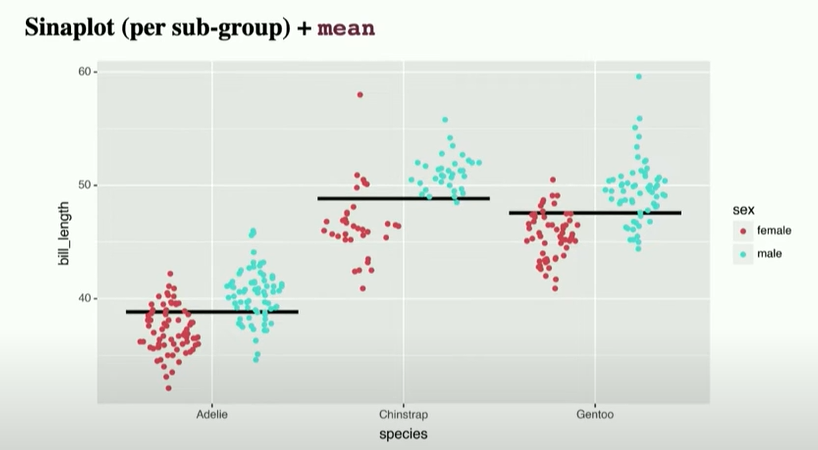

In [1]:
# usar o pandas para ler e guardar um dataframe: https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv

In [4]:
# pacotes
import pandas as pd
import numpy as np

In [5]:
# Carregar
url = 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv'
df_gini = pd.read_csv(url, sep=';', skiprows=2, decimal=',')

# Quebrar coluna município
df_gini[['cod_ibge', 'Município']] = df_gini['Município'].str.split(' ', n=1, expand=True)

# Usar os dois primerios caracteres de cod_ibge para criar a coluna cod_uf
df_gini['uf'] = df_gini['cod_ibge'].str[:2]

# remover as duas últimas linhas
df_gini = df_gini.iloc[:-2]

# imprimir head

display(df_gini.head())

# imprimir tail
display(df_gini.tail())

,Município,1991,2000,2010,cod_ibge,uf
0,Alta Floresta D'Oeste,"0,5983","0,5868",0.5893,110001,11
1,Alto Alegre dos Parecis,...,"0,508",0.5491,110037,11
2,Alto Paraíso,...,"0,6256",0.5417,110040,11
3,Alvorada D'Oeste,"0,569","0,6534",0.5355,110034,11
4,Ariquemes,"0,5827","0,5927",0.5496,110002,11


,Município,1991,2000,2010,cod_ibge,uf
5560,Vianópolis,"0,5622","0,6746",0.4672,522200,52
5561,Vicentinópolis,"0,6308","0,5934",0.4824,522205,52
5562,Vila Boa,...,"0,5308",0.4935,522220,52
5563,Vila Propício,...,"0,5299",0.5240,522230,52
5564,Brasília,"0,6203","0,6406",0.6370,530010,53


In [6]:
df_long = pd.melt(df_gini, id_vars=['uf','cod_ibge', 'Município'], value_vars=['1991', '2000', '2010'], var_name='ano', value_name='gini')
display(df_long.head())

,uf,cod_ibge,Município,ano,gini
0,11,110001,Alta Floresta D'Oeste,1991,"0,5983"
1,11,110037,Alto Alegre dos Parecis,1991,...
2,11,110040,Alto Paraíso,1991,...
3,11,110034,Alvorada D'Oeste,1991,"0,569"
4,11,110002,Ariquemes,1991,"0,5827"


In [8]:
!pip install ibge

from ibge.localidades import Estados, Regioes
import pandas as pd

# Pegar os estados com sua região
estados = Estados().json()  # lista de dicts, cada um com 'id', 'sigla', 'nome', 'regiao'
# Exemplo: {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}} :contentReference[oaicite:1]{index=1}

df_estados = pd.DataFrame(estados)
df_estados.head()

# Cria uma coluna com o nome da região
df_estados['regiao_nome'] = df_estados['regiao'].apply(lambda x: x['nome'])

# seleção de colunas mantendo apenas id e regiao_nome
df_regiao = df_estados[['id','regiao_nome']]

# criar coluna em df_regiao considerando se regiao_nome for norte ou nordeste então Norte, senão Sul
df_regiao['grupo'] = df_regiao['regiao_nome'].apply(lambda x: 'Norte' if x in ['Norte', 'Nordeste'] else 'Sul')

#garantir que cod_uf e id são do mesmo tipo
df_regiao['id'] = df_regiao['id'].astype(str)
df_long['uf'] = df_long['uf'].astype(str)
# fazer o merge entre df_long e df_regiao
df_long = df_long.merge(df_regiao, left_on='uf', right_on='id', how='left')

# seleção de variáveis: manter uf, ano, gini e grupo
df_long = df_long[['uf', 'ano', 'gini', 'grupo']]
df_long

/tmp/ipython-input-3294152110.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiao['grupo'] = df_regiao['regiao_nome'].apply(lambda x: 'Norte' if x in ['Norte', 'Nordeste'] else 'Sul')
/tmp/ipython-input-3294152110.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiao['id'] = df_regiao['id'].astype(str)


,uf,ano,gini,grupo
0,11,1991,"0,5983",Norte
1,11,1991,...,Norte
2,11,1991,...,Norte
3,11,1991,"0,569",Norte
4,11,1991,"0,5827",Norte
...,...,...,...,...
16690,52,2010,0.4672,Sul
16691,52,2010,0.4824,Sul
16692,52,2010,0.4935,Sul
16693,52,2010,0.524,Sul


In [9]:
df_long['gini'] = pd.to_numeric(
    df_long['gini'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

# Calculate the mean gini for each UF and year
df_gini_mean_by_uf_year = df_long.groupby(['uf', 'ano', 'grupo'])['gini'].mean().reset_index()
#df_gini_mean_by_uf_year['grupo'] = np.where(df_gini_mean_by_uf_year['uf'].isin(norte_nordeste), 'Norte', 'Sul')

# Display the new DataFrame
display(df_gini_mean_by_uf_year.head())

,uf,ano,grupo,gini
0,11,1991,Norte,0.586809
1,11,2000,Norte,0.589750
2,11,2010,Norte,0.536892
3,12,1991,Norte,0.555500
4,12,2000,Norte,0.606527


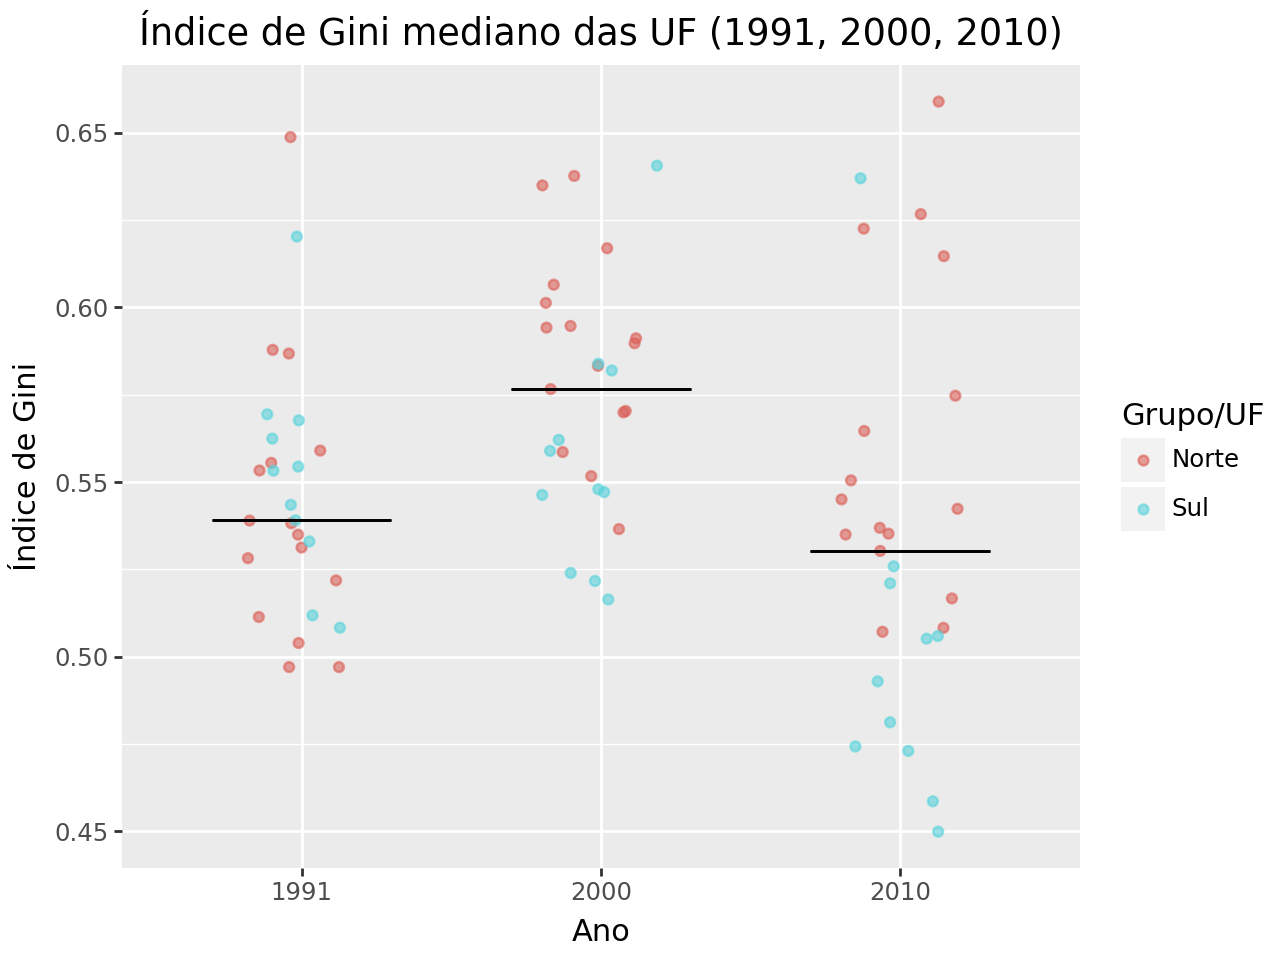

In [10]:
#!pip install plotnine

from plotnine import ggplot, aes, geom_jitter, labs, stat_summary
import numpy as np

p = (
    ggplot(df_gini_mean_by_uf_year, aes('ano', 'gini', color='grupo'))
    + geom_jitter(width=0.2, alpha=0.6)  # mostra as UFs por grupo
    + stat_summary(
        aes(x='ano', y='gini'),  # 👈 sem group='grupo'
        fun_y=np.median,
        fun_ymin=np.median,
        fun_ymax=np.median,
        geom="crossbar",
        color="black",
        width=0.6,
        size=0.3
    )
    + labs(
        title='Índice de Gini mediano das UF (1991, 2000, 2010)',
        x='Ano',
        y='Índice de Gini',
        color='Grupo/UF'
    )
)
p





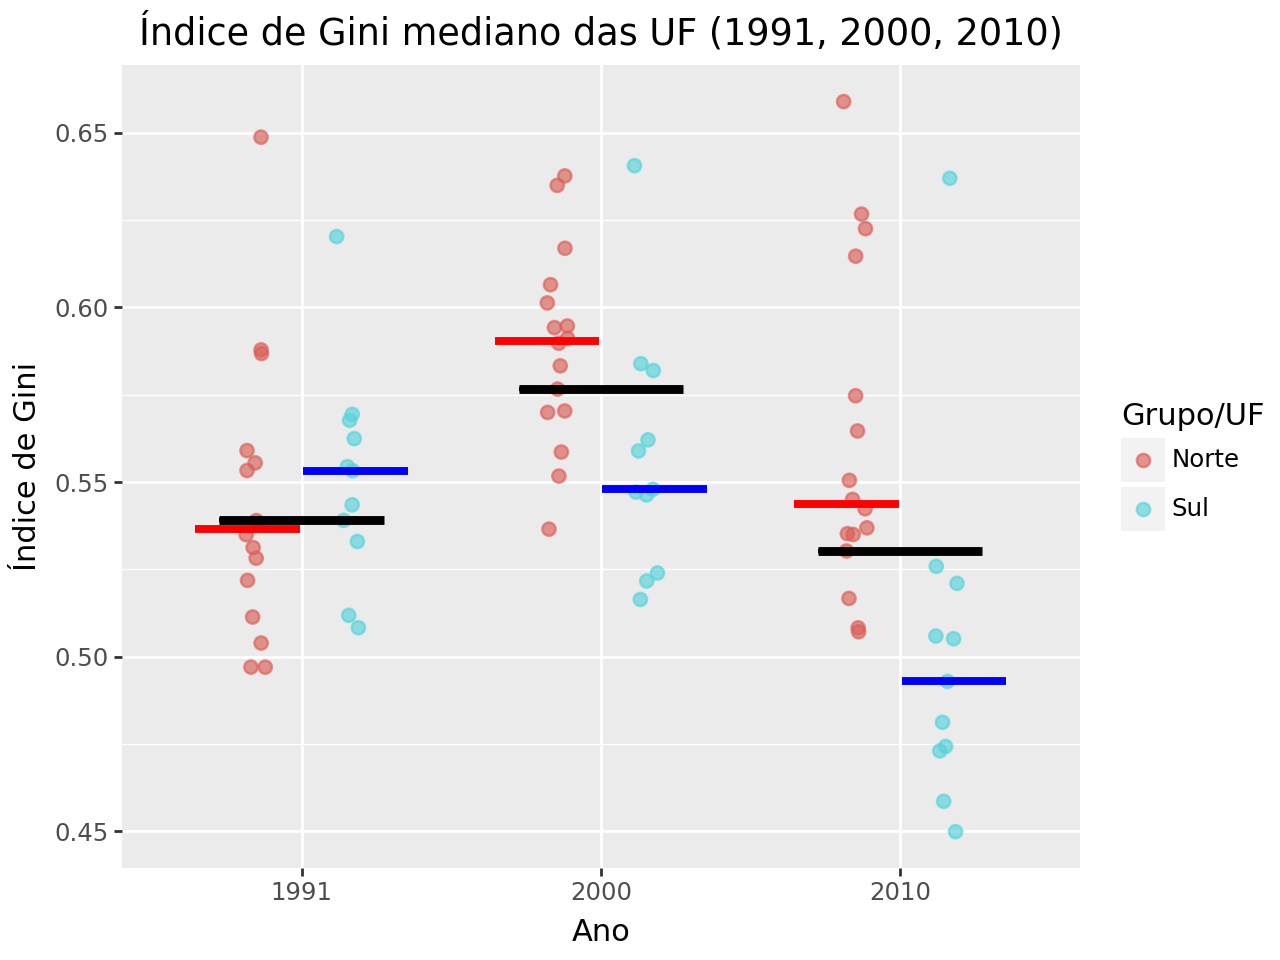

In [12]:
from plotnine import (
    ggplot, aes, geom_point, labs, stat_summary
)
from plotnine.positions import position_jitterdodge, position_nudge
import numpy as np

dfp = df_gini_mean_by_uf_year.copy()
dfp['ano'] = dfp['ano'].astype('category')

# filtros por grupo
df_norte = dfp[dfp['grupo'] == 'Norte']
df_sul   = dfp[dfp['grupo'] == 'Sul']

p = (
    ggplot(dfp, aes('ano', 'gini', color='grupo'))
    # pontos (UFs) com jitter + dodge por grupo
    + geom_point(
        position=position_jitterdodge(jitter_width=0.08, dodge_width=0.6),
        alpha=0.65, size=2.2
    )

    # barra da MEDIANA do NORTE (vermelha, fina), nudged à esquerda
    + stat_summary(
        data=df_norte, mapping=aes(x='ano', y='gini'),
        fun_y=np.median, fun_ymin=np.median, fun_ymax=np.median,
        geom="crossbar",
        position=position_nudge(x=-0.18),
        color="red", width=0.35, size=0.8, show_legend=False
    )

    # barra da MEDIANA do SUL (azul, fina), nudged à direita
    + stat_summary(
        data=df_sul, mapping=aes(x='ano', y='gini'),
        fun_y=np.median, fun_ymin=np.median, fun_ymax=np.median,
        geom="crossbar",
        position=position_nudge(x=+0.18),
        color="blue", width=0.35, size=0.8, show_legend=False
    )

    # barra da MEDIANA GERAL (preta) por ano (sem deslocar)
    + stat_summary(
        aes(x='ano', y='gini'),
        fun_y=np.median, fun_ymin=np.median, fun_ymax=np.median,
        geom="crossbar",
        color="black", width=0.55, size=0.9, show_legend=False
    )

    + labs(
        title='Índice de Gini mediano das UF (1991, 2000, 2010)',
        x='Ano', y='Índice de Gini', color='Grupo/UF'
    )
)
p


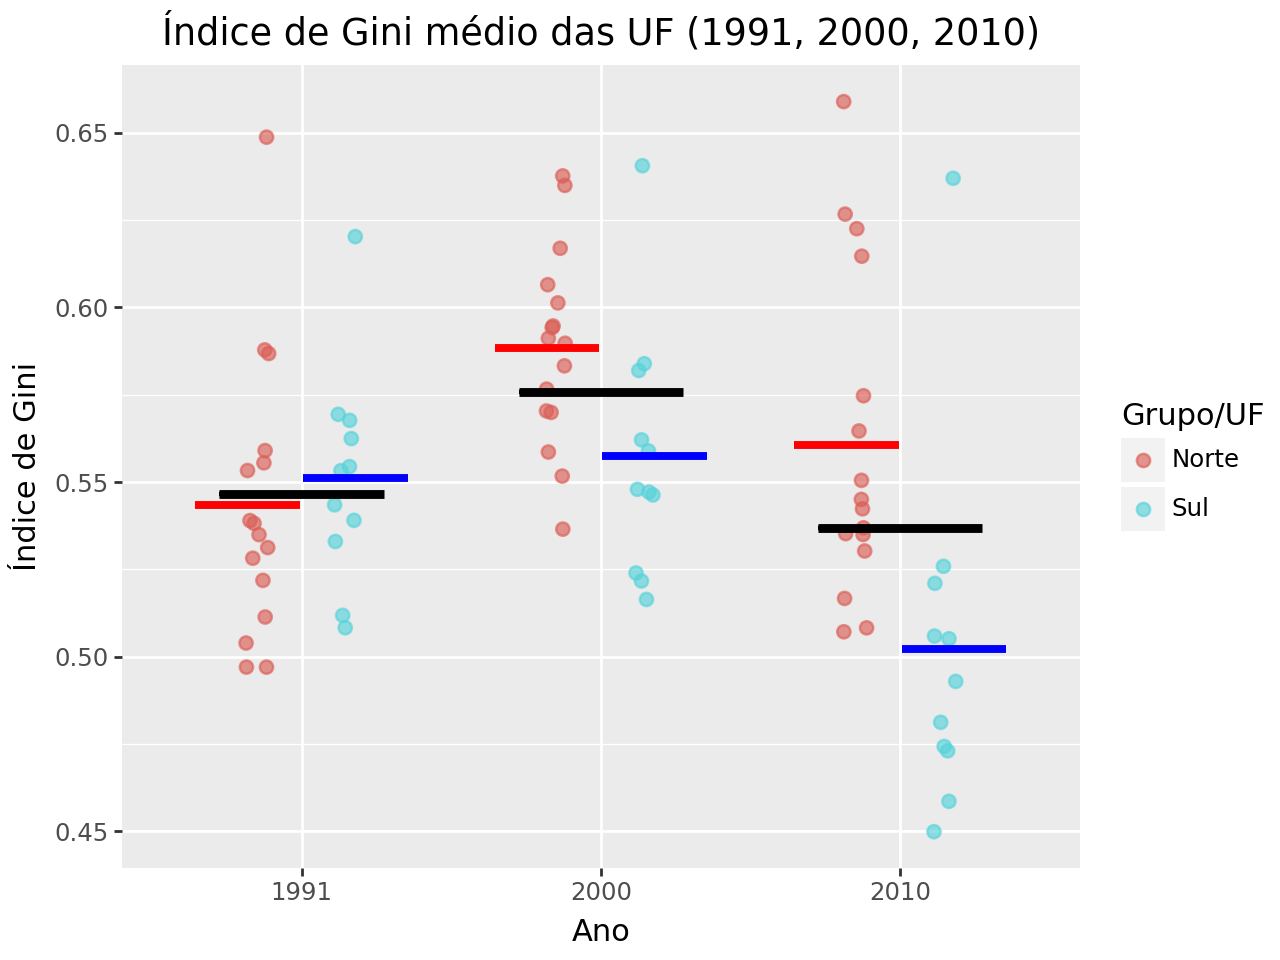

In [14]:
from plotnine import (
    ggplot, aes, geom_point, labs, stat_summary
)
from plotnine.positions import position_jitterdodge, position_nudge
import numpy as np

dfp = df_gini_mean_by_uf_year.copy()
dfp['ano'] = dfp['ano'].astype('category')

# filtros por grupo
df_norte = dfp[dfp['grupo'] == 'Norte']
df_sul   = dfp[dfp['grupo'] == 'Sul']

p = (
    ggplot(dfp, aes('ano', 'gini', color='grupo'))
    # pontos (UFs) com jitter + dodge por grupo
    + geom_point(
        position=position_jitterdodge(jitter_width=0.08, dodge_width=0.6),
        alpha=0.65, size=2.2
    )

    # barra da MÉDIA do NORTE (vermelha, fina), nudged à esquerda
    + stat_summary(
        data=df_norte, mapping=aes(x='ano', y='gini'),
        fun_y=np.mean, fun_ymin=np.mean, fun_ymax=np.mean,
        geom="crossbar",
        position=position_nudge(x=-0.18),
        color="red", width=0.35, size=0.8, show_legend=False
    )

    # barra da MÉDIA do SUL (azul, fina), nudged à direita
    + stat_summary(
        data=df_sul, mapping=aes(x='ano', y='gini'),
        fun_y=np.mean, fun_ymin=np.mean, fun_ymax=np.mean,
        geom="crossbar",
        position=position_nudge(x=+0.18),
        color="blue", width=0.35, size=0.8, show_legend=False
    )

    # barra da MÉDIA GERAL (preta) por ano (sem deslocar)
    + stat_summary(
        aes(x='ano', y='gini'),
        fun_y=np.mean, fun_ymin=np.mean, fun_ymax=np.mean,
        geom="crossbar",
        color="black", width=0.55, size=0.9, show_legend=False
    )

    + labs(
        title='Índice de Gini médio das UF (1991, 2000, 2010)',
        x='Ano', y='Índice de Gini', color='Grupo/UF'
    )
)
p
